## K-Means

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [28]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [29]:
label = kmeans.labels_

In [30]:
label

array([1, 1, 1, 0, 0, 2], dtype=int32)

In [31]:
np.array([[0,0], [12, 3]])

array([[ 0,  0],
       [12,  3]])

In [32]:
kmeans.predict([[0,0],[12,3]])

array([1, 0], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[10.,  3.],
       [ 1.,  2.],
       [10.,  0.]])

In [34]:
kmeans.inertia_

10.0

## silhouette_score

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_score(X, label)

0.43630092057240805

## WCSS

In [39]:
wcss=[]
for i in [2,3]:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

In [41]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Y')

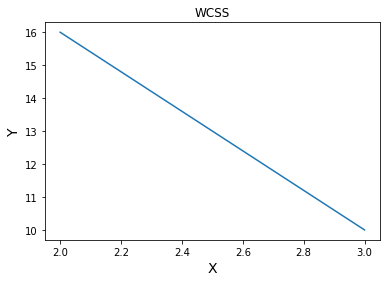

In [47]:
plt.plot([2,3],wcss)
plt.title("WCSS")
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)

## AgglomerativeClustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

In [49]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [50]:
clustering = AgglomerativeClustering()

In [51]:
clustering.fit(X)

AgglomerativeClustering()

In [52]:
clustering.labels_

array([1, 1, 1, 0, 0, 0])

## Dendrogram

In [53]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [54]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [55]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
data=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [58]:
X=np.array(data)

In [59]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [60]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [65]:
# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(n_clusters=3)

In [63]:
model = model.fit(X)

In [66]:
model1 = model1.fit(X)

In [64]:
model.labels_

array([146, 167, 156, 174, 159, 132, 102, 171, 108, 163, 172, 109, 160,
       157, 112, 118, 127, 110, 147, 145, 117, 195, 137, 178, 149, 197,
       173, 175, 152, 169, 126, 161, 128, 100, 123, 153, 111, 116, 131,
       124,  85, 196, 193,  55, 139, 141, 113, 106, 198, 138,  72, 194,
       189, 104, 170, 115, 107, 185,  84, 129,  96, 151, 142, 176, 191,
       199, 101, 192, 168, 114,  83, 177,  54, 158, 190, 187, 162,  80,
       188,  94,  95,  53, 136, 130,  56,  27, 144, 155, 103, 143, 179,
        41, 186, 181, 183, 119,  99,  26, 184,  87, 182,  92,  61,  90,
        86,  57, 154,  91, 166,  71,  77, 148,  50,  49,  76,  24,  78,
        64, 125, 180, 120, 122,  63, 105,  75,  65, 165,  38,  37,  97,
        79, 134,  93, 135,  18, 121,  89, 164,  58,  28, 133,  51,  46,
        73,  47,  60,  70,  81, 150,  39,  44,  88,  82,  74, 140,  66,
        98,  59,  35,  52,  31,  32,  45,  42,  69,  36,  17,  29,  62,
        43,  21,  15,  25,  22,  40,  30,  67,  12,  48,  20,   

In [67]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

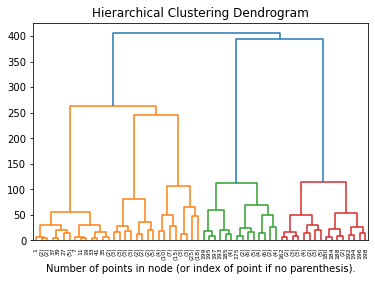

In [69]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBScan

In [70]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)